# Title: Exploratory Analysis and Sales Prediction on Walmart data

# Notebook Author : Maryam Oyeyiola
Github : https://github.com/Olatohun

In [1]:
# import dataset
import pandas as pd

df = pd.read_csv('Walmart_Store_sales.csv')

--- Data description

1. Store - the store number

2. Date - the week of sales

3. Weekly_Sales - sales for the given store

4. Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

5. Temperature - Temperature on the day of sale

6. Fuel_Price - Cost of fuel in the region

7. CPI – Prevailing consumer price index

8. Unemployment - Prevailing unemployment rate

In [2]:
df.head(15)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [3]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# get dataset's statistic summary
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
# format date feature
from datetime import datetime

df.Date = pd.to_datetime(df.Date)
df.Date

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [8]:
# split date feature in separate columns

df['Year']=df.Date.dt.year
df['Month']=df.Date.dt.month
df['Day']=df.Date.dt.day

In [9]:
# see range of data, year-wise
df.Year.value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

# Question 1 - Which store has maximum sales 

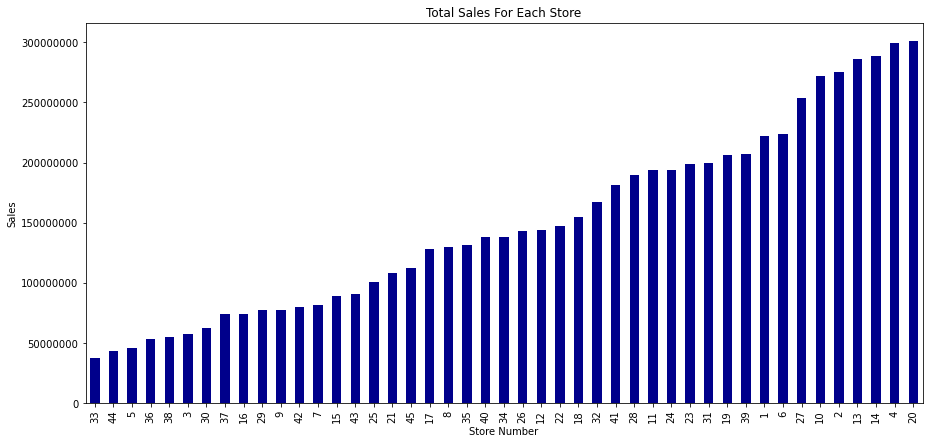

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


df_ = df.groupby('Store')['Weekly_Sales'].sum().sort_values() # summary of total sales for each store

# plot resuls
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
df_.plot(kind='bar', figsize=(15,7), color='#00008B', 
         title='Total Sales For Each Store',
         xlabel='Store Number', ylabel='Sales')
plt.show()

In [11]:
# output result

print('The store with the highest sale is store 20, with a total sales of ${t}'
      .format(t=round(sum(df.loc[df.Store==20, "Weekly_Sales"]), 2)))

The store with the highest sale is store 20, with a total sales of $301397792.46


# Question 2 -  Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

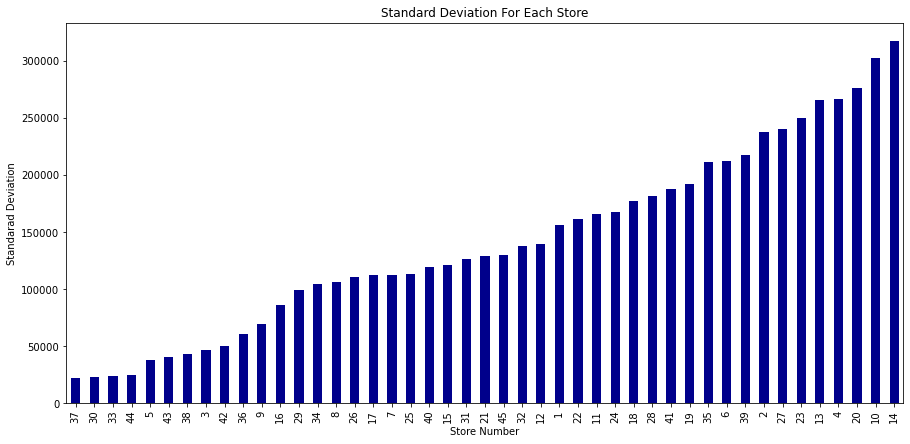

In [12]:
# calculating and plotting the standard deviation

std =df.groupby('Store')['Weekly_Sales'].std().sort_values() # get standard deviation for each store

# plot results
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
std.plot(kind='bar', figsize=(15,7), color='#00008B', 
         title='Standard Deviation For Each Store',
         xlabel='Store Number', ylabel='Standarad Deviation')
plt.show()

In [13]:
print('The store with the highest standard deviation is store {store}, with a standard deviation of {std}'
      .format(store=std.index[-1], std=round(std.max(),2)))

The store with the highest standard deviation is store 14, with a standard deviation of 317569.95


In [14]:
# get mean for each store's sales
mean =df.groupby('Store')['Weekly_Sales'].mean().sort_values()
round(mean.max(),2) #output maximum mean value

2107676.87

In [15]:
# check coefficient
coeff = (std/mean).sort_values(ascending=False)
# coeff
print('Store number:', coeff.index[0], '\nCoefficient:', round(coeff.max(),6))

Store number: 35 
Coefficient: 0.229681


Text(0.5, 1.0, 'Sales Distribution of Store 35')

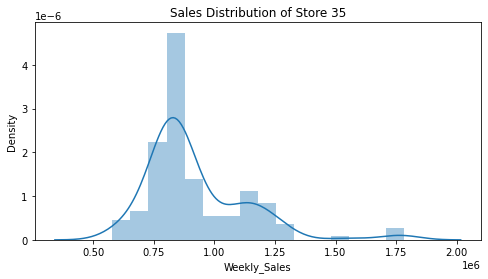

In [16]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# group data by store number
store = df.groupby('Store')
store_35 = store.get_group(35) #get data for store 35

# plot results
plt.figure(figsize=(8,4))
sns.distplot(store_35['Weekly_Sales'])
plt.title('Sales Distribution of Store 35')

# Question 3 - Which store/s has good quarterly growth rate in third quarter of 2012

Strategy:

Subtract the previous period revenue from the current period revenue. Calculate the current period revenue minus the previous period revenue. For example, if you are comparing Q4 earnings with Q3 earnings, subtract the Q3 revenue from the Q4 revenue.

In [17]:
year = df.groupby('Year')
year_2012 = year.get_group(2012)

year_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,2012,6,1
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1,13
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1,20
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1,27
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,2012,3,2
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


In [18]:
# Q3 begins July - September
# Q3 begins april - june
Q2 = year_2012.loc[year_2012.Month.isin([4,5,6])]
Q3 = year_2012.loc[year_2012.Month.isin([7,8,9])]

display(Q2.head())
display(Q3.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,2012,6,1
113,1,2012-06-04,1899676.88,0,70.43,3.891,221.435611,7.143,2012,6,4
114,1,2012-04-13,1621031.70,0,69.07,3.891,221.510210,7.143,2012,4,13
115,1,2012-04-20,1521577.87,0,66.76,3.877,221.564074,7.143,2012,4,20
116,1,2012-04-27,1468928.37,0,67.23,3.814,221.617937,7.143,2012,4,27


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
109,1,2012-09-03,1675431.16,0,58.76,3.669,221.059189,7.348,2012,9,3
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143,2012,8,6
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,2012,7,13
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,2012,7,20
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,2012,7,27


In [19]:
Q2_sales = Q2.groupby('Store')['Weekly_Sales'].sum().sort_values() #sales of each store in Q2
Q3_sales = Q3.groupby('Store')['Weekly_Sales'].sum().sort_values() #sales of each store in Q2

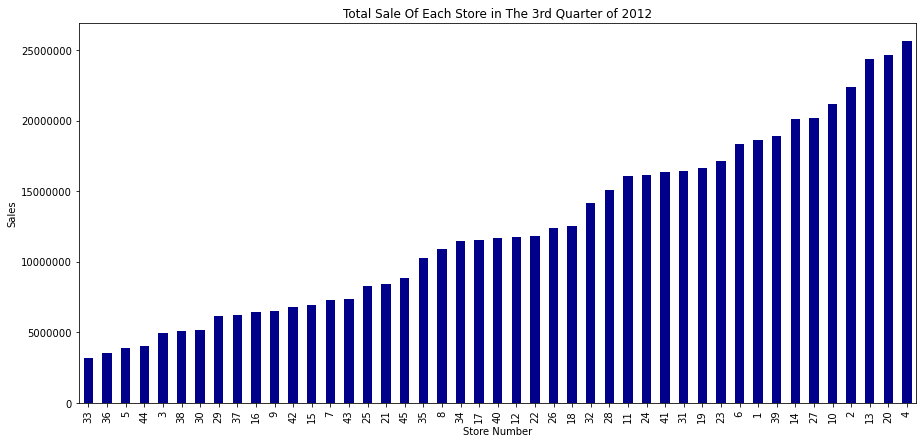

In [20]:
# plot results

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
Q3_sales.plot(kind='bar', figsize=(15,7), color='#00008B', 
              title='Total Sale Of Each Store in The 3rd Quarter of 2012',
              xlabel='Store Number', ylabel='Sales')
plt.show()

In [21]:
Q3_sales

Store
33     3177072.43
36     3578123.58
5      3880621.88
44     4020486.01
3      4966495.93
38     5129297.64
30     5181974.44
29     6127862.07
37     6250524.08
16     6441311.11
9      6528239.56
42     6830839.86
15     6909374.37
7      7322393.92
43     7376726.03
25     8309440.44
21     8403507.99
45     8851242.32
35    10252122.68
8     10873860.34
34    11476258.98
17    11533998.38
40    11647661.37
12    11777508.50
22    11818544.33
26    12417575.35
18    12507521.72
32    14142164.84
28    15055659.67
11    16094363.07
24    16125999.86
41    16373588.44
31    16454328.46
19    16644341.31
23    17103654.36
6     18341221.11
1     18633209.98
39    18899955.17
14    20140430.40
27    20191238.11
10    21169356.45
2     22396867.61
13    24319994.35
20    24665938.11
4     25652119.35
Name: Weekly_Sales, dtype: float64

In [22]:
print('The store with the highest sales in the third quarter is store {store}, with a total sales of {sales}'
      .format(store=Q3_sales.index[-1], sales=round(Q3_sales.max(),2)))

The store with the highest sales in the third quarter is store 4, with a total sales of 25652119.35


In [23]:
df2 = pd.DataFrame()
df2["Q2_Sales"] = Q2_sales
df2["Q3_Sales"] = Q3_sales

df2.head()

,Q2_Sales,Q3_Sales
Store,,
33,3512138.05,3177072.43
36,4090378.90,3578123.58
44,4322555.33,4020486.01
5,4427262.21,3880621.88
3,5562668.16,4966495.93


In [24]:
# subtract Q2 from Q3
Q_diff = Q3_sales - Q2_sales

# (divide difference by Q2) * 100
Q_growth = (Q_diff/Q2_sales) * 100

In [25]:
# view result
Q_growth.sort_values(ascending=False)

Store
16    -2.789294
7     -3.824738
35    -4.663086
26    -6.057624
39    -6.396875
23    -6.452678
41    -6.756521
44    -6.988212
32    -8.258527
37    -8.881539
8     -8.885460
21    -8.917697
19    -9.123188
24    -9.242314
13    -9.264673
40    -9.354939
33    -9.540218
18    -9.593152
4     -9.625310
31    -9.835123
11    -9.982231
25   -10.143607
42   -10.217957
10   -10.293384
30   -10.444624
20   -10.469051
43   -10.474373
38   -10.520358
27   -10.633092
2    -10.716535
3    -10.717379
17   -10.719910
12   -10.731580
34   -10.746352
22   -11.332535
28   -11.364302
1    -11.426342
6    -11.518899
9    -12.152357
15   -12.183321
5    -12.347142
36   -12.523420
29   -12.888364
45   -13.889207
14   -17.551086
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

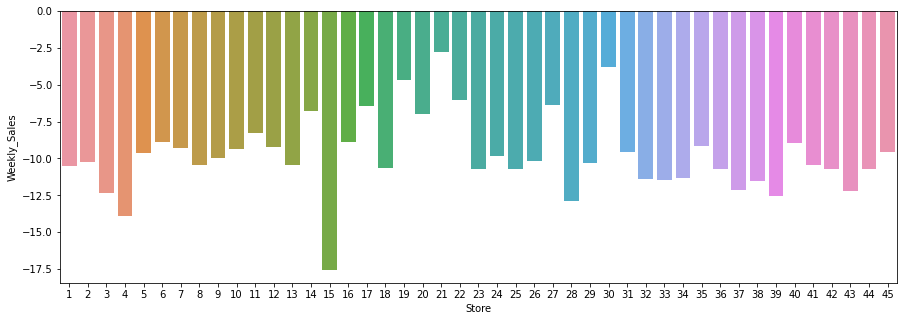

In [26]:
# plot result
plt.figure(figsize=(15,5))
sns.barplot(x=df2.index, y = Q_growth, data = df2)

In [27]:
store = Q_growth.sort_values(ascending=False)

print('The store with the highest growth is store {store}, with a growth of {growth}%'
      .format(store=store.index[0], growth=round(store.max(),2)))

The store with the highest growth is store 16, with a growth of -2.79%


# Question 4 - Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

--- Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [28]:
df.Year.value_counts() #the year column is only up to 2012

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

In [29]:
#  y m d
# manually input holiday dates

Super_Bowl =['2010-02-12', '2011-02-11', '2012-02-10']
Labour_Day =  ['2010-09-10', '2011-09-09', '2012-09-07']
Thanksgiving =  ['2010-11-26', '2011-11-25', '2012-11-23']
Christmas = ['2010-12-31', '2011-12-30', '2012-12-28']

def convertD(holiday):
    for i in holiday:
        pd.to_datetime(i)
        
convertD(Super_Bowl)
convertD(Labour_Day)
convertD(Thanksgiving)
convertD(Christmas)

In [30]:
Super_Bowl

['2010-02-12', '2011-02-11', '2012-02-10']

In [31]:
# extract data for each holiday

Super_Bowl_Df = pd.DataFrame(df.loc[df.Date.isin(Super_Bowl)])
Labour_Day_Df = pd.DataFrame(df.loc[df.Date.isin(Labour_Day)])
Thanksgiving_Df = pd.DataFrame(df.loc[df.Date.isin(Thanksgiving)])
Christmas_Df = pd.DataFrame(df.loc[df.Date.isin(Christmas)])

In [32]:
Super_Bowl_Df # the return output for super bowl holiday is empty

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day


In [33]:
Labour_Day_Df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
83,1,2011-09-09,1540471.24,1,76.00,3.546,215.861056,7.962,2011,9,9
226,2,2011-09-09,1748000.65,1,77.97,3.546,215.514829,7.852,2011,9,9
369,3,2011-09-09,377347.49,1,81.72,3.546,219.213530,7.567,2011,9,9
512,4,2011-09-09,2093139.01,1,73.34,3.554,129.368613,5.644,2011,9,9
655,5,2011-09-09,321110.22,1,79.04,3.546,216.422682,6.529,2011,9,9


In [34]:
# extract data for non-holiday days

No_Holiday_Df=pd.DataFrame(df.loc[df.Holiday_Flag == 0])
No_Holiday_Df.Holiday_Flag.value_counts()

0    5985
Name: Holiday_Flag, dtype: int64

In [35]:
#  Compute sales mean for each holiday

# Super_Bowl_Df
SB_mean = round(Super_Bowl_Df['Weekly_Sales'].mean(),2)
print('Super bowl holiday mean sales : ',SB_mean)
 
# Labour_Day_Df
LB_mean = round(Labour_Day_Df['Weekly_Sales'].mean(),2)
print('Labour day holiday mean sales : ', LB_mean)

# Thanksgiving_Df
TG_mean =round(Thanksgiving_Df['Weekly_Sales'].mean(),2)
print('Thanksgiving holiday mean sales : ', TG_mean)

# Christmas_Df
CM_mean= round(Christmas_Df['Weekly_Sales'].mean(),2)
print('Christmas holiday mean sales : ',CM_mean)

# No_Holiday_Df
NH_mean =round(No_Holiday_Df['Weekly_Sales'].mean(),2)
print('No holiday mean sales : ', NH_mean)

Super bowl holiday mean sales :  nan
Labour day holiday mean sales :  1039182.83
Thanksgiving holiday mean sales :  1471273.43
Christmas holiday mean sales :  960833.11
No holiday mean sales :  1041256.38


The super holiday has no sales data. The mean sales of the Thanksgiving holiday is higher than the mean sales of the weeks that had no holiday.

# Question 5 - Provide a monthly and semester view of sales in units and give insights

In [36]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


In [37]:
# extract data for each year

monthly_sales_2010 = df[df['Year']==2010]['Weekly_Sales'].groupby(df['Month']).mean()
monthly_sales_2011 = df[df['Year']==2011]['Weekly_Sales'].groupby(df['Month']).mean()
monthly_sales_2012 = df[df['Year']==2012]['Weekly_Sales'].groupby(df['Month']).mean()

In [38]:
# view sample output
monthly_sales_2010

Month
1     9.386639e+05
2     1.064372e+06
3     1.034590e+06
4     1.021177e+06
5     1.039303e+06
6     1.055082e+06
7     1.023702e+06
8     1.025212e+06
9     9.983559e+05
10    1.027201e+06
11    1.176097e+06
12    1.198413e+06
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

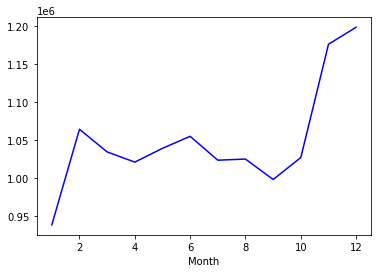

In [39]:
# monthly_sales_2010  # line plot of sales margin for 2010 per every 2 months
sns.lineplot(monthly_sales_2010.index, monthly_sales_2010.values, color='blue') 

<AxesSubplot:xlabel='Month'>

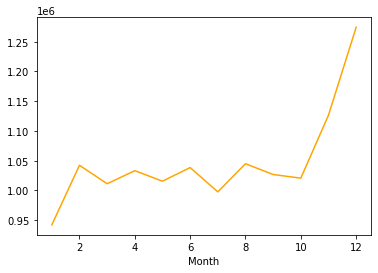

In [40]:
# monthly_sales_2011
sns.lineplot(monthly_sales_2011.index, monthly_sales_2011.values, color='orange')

<AxesSubplot:xlabel='Month'>

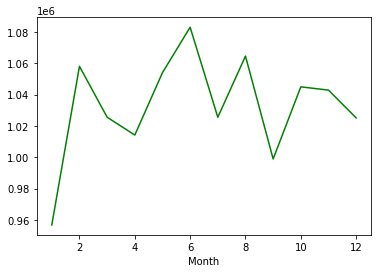

In [41]:
# monthly_sales_2012
sns.lineplot(monthly_sales_2012.index, monthly_sales_2012.values, color='green')

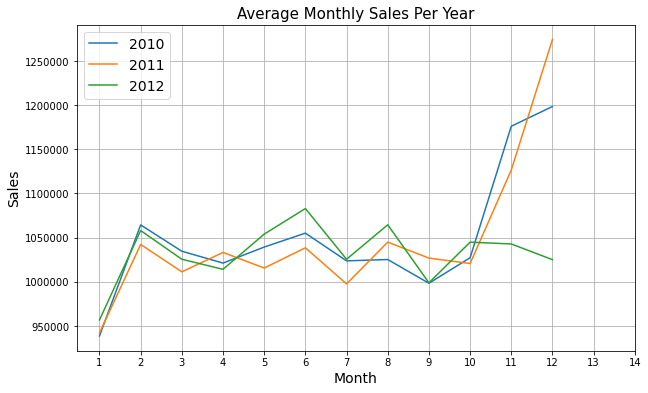

In [54]:
# inspiration: https://www.analyticsvidhya.com/blog/2022/01/walmarts-sales-analysis-through-data-visualization/

import numpy as np
# plotting monthly sales margin for all the years

plt.figure(figsize=(10,6)) # size of chart
sns.lineplot(monthly_sales_2010.index, monthly_sales_2010.values) # 2010 data
sns.lineplot(monthly_sales_2011.index, monthly_sales_2011.values) # 2011 data
sns.lineplot(monthly_sales_2012.index, monthly_sales_2012.values) # 2012 data
plt.grid() # background of chart
plt.xticks(np.arange(1,15, step=1)) # x-axis value/length
plt.ticklabel_format(useOffset=False, style='plain', axis='y') #format values on y-axis

plt.legend(['2010', '2011', '2012'], loc='best', fontsize=14) # line plot label
plt.title('Average Monthly Sales Per Year', fontsize=15) #chart title
plt.ylabel('Sales', fontsize=14) # name for y-axis
plt.xlabel('Month', fontsize=14) # name for x-axis
plt.show() # show result

Insights of the line plots:
    
a) sales for all the years is on the rise in the first month of the year but descreases in february

b) there was a decrease in the december sales of 2012 while 2010 and 2011 had positive growth

Sales decreases mostly in January and rises significantly in November and December, this is most likely as a result of the Thanksgiving and Christmas holidays as sales flunctuate (mostly on negative side) during the prior months before November and December.

# Prediction models to forecast demand for all stores

In [43]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df2=df.copy()

# splitting original dataset into X (independent feature) and y (dependent feature)
X = df2.drop(['Weekly_Sales','Date'], axis=1)
y = df2['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Mean Squared Error => 271380214829.6
Model Accuracy => 15.98


<AxesSubplot:ylabel='Weekly_Sales'>

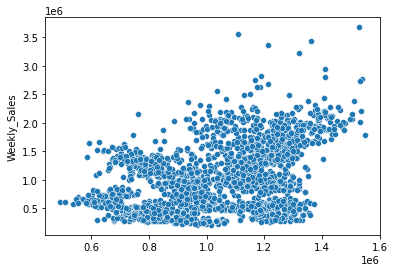

In [45]:
# Linear Regression Model for all stores

lir =LinearRegression()
lir.fit(X_train, y_train)
preds = lir.predict(X_test)

print('Mean Squared Error => {mse}'.format(mse=(round(mean_squared_error(y_test, preds),2))))
print('Model Accuracy => {acc}'.format(acc=round(lir.score(X_test, y_test)*100, 2)))
sns.scatterplot(preds, y_test)

Mean Squared Error => 21233400439.77
Model Accuracy => 93.43


<AxesSubplot:ylabel='Weekly_Sales'>

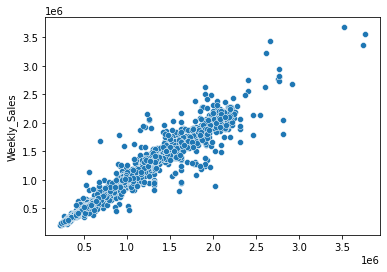

In [46]:
# Descision Tree Regressor Model

dtr =DecisionTreeRegressor()
dtr.fit(X_train, y_train)
preds0 = dtr.predict(X_test)

print('Mean Squared Error => {mse}'.format(mse=(round(mean_squared_error(y_test, preds0),2))))
print('Model Accuracy => {acc}'.format(acc=round(dtr.score(X_test, y_test)*100, 2)))
sns.scatterplot(preds0, y_test)

The Decision tree algorithm performed better on the data compared to the Linear regression algorithm. It is a little obvious with the scatterplot. The plot for the Decision Tree algotithm shows an upward slope while Linear regression plot shows heteroskedasticity

# Prediction models to forecast demand for store 1

In [47]:
store_1 = pd.DataFrame(df.loc[df.Store == 1])
store_1 = store_1.drop('Date', axis=1)
store_1.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month', 'Day'],
      dtype='object')

In [48]:
store_1.Store.value_counts()

1    143
Name: Store, dtype: int64

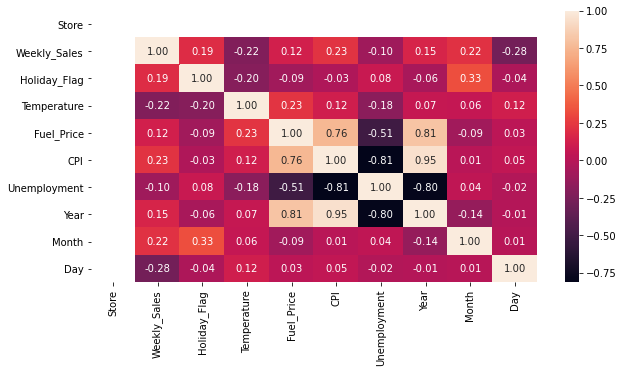

In [49]:
plt.figure(figsize = (10,5))
sns.heatmap(store_1.corr(), annot=True, fmt=".2f");

None of the other variables show a major correlation with the weekly_sales variable

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X2 = store_1.drop(['Weekly_Sales'], axis=1)
y2= store_1['Weekly_Sales']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

Mean Squared Error => 16416645411.33
Model Accuracy => 26.88


<AxesSubplot:ylabel='Weekly_Sales'>

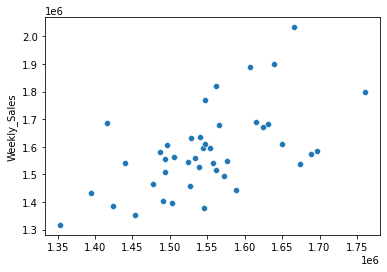

In [51]:
# Linear Regression Model

lir =LinearRegression()
lir.fit(X2_train, y2_train)
preds2 = lir.predict(X2_test)

print('Mean Squared Error => {mse}'.format(mse=(round(mean_squared_error(y2_test, preds2),2))))
print('Model Accuracy => {acc}'.format(acc=round(lir.score(X2_test, y2_test)*100, 2)))
sns.scatterplot(preds2, y2_test)

Mean Squared Error => 19930140651.92
Model Accuracy => 11.23


<AxesSubplot:ylabel='Weekly_Sales'>

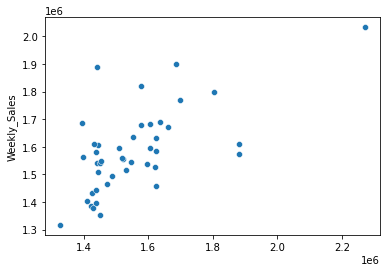

In [52]:
# Descision Tree Regressor Model

dtr =DecisionTreeRegressor()
dtr.fit(X2_train, y2_train)
preds2 = dtr.predict(X2_test)

print('Mean Squared Error => {mse}'.format(mse=(round(mean_squared_error(y2_test, preds2),2))))
print('Model Accuracy => {acc}'.format(acc=round(dtr.score(X2_test, y2_test)*100, 2)))
sns.scatterplot(preds2, y2_test)

Looking at the scatter plot we can tell that the linear regression algorithm performed better compared to the decision tree algorithm, the mean squared error is on the lower side as well